In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import json
import os
def read_json(f):
    f = open(f) 
    return json.load(f) 

In [2]:

# shown on plots
ESTIMATOR_NAMES = {
    "SOI":r'S$\Omega$I',
    "MINE": "Line-MINE",
    "InfoNCE": "Line-InfoNCE",
    "NWJ": "Line-NWJ",
    "CLUB": "Line-CLUB",

}

MARKers = {
    "SOI":'*',
    "MINE": ".",
    "InfoNCE": "v",
    "NWJ": "x",
    "CLUB": "d",
}

def plot(
    results,
    estimator_names=ESTIMATOR_NAMES,
    filename=None,
    plot_std: bool = False,
    alpha: float = 0.2
):
    fig, ax = plt.subplots(figsize=(4, 3)) 
    
    for key in results.keys():
        
        ax.plot(results[key]["gt"]
            ,results[key]["e"],
           marker=MARKers[key],markersize=5,
            label=estimator_names[key],
        )
        if plot_std:
            ax.fill_between(
                results[key]["gt"],
                results[key]["e"] - results[key]["std"],
                results[key]["e"] + results[key]["std"],
               
                alpha=alpha,
                label=None,
            )
    ax.plot(
        results["SOI"]["gt"],
        results["SOI"]["gt"],
        linestyle=":",
        color="black",
        label="GT",
    )
   
    #ax.set_ylim(bottom=bot,top=top)
    ax.set_xlabel(r'True $\Omega(X)$',fontsize=14)
    ax.set_ylabel(r'$\Omega(X)$ estimate',fontsize=14)
    matplotlib.rc('xtick', labelsize=13) 
    matplotlib.rc('ytick', labelsize=13)
    plt.legend( title = "",fontsize=14,ncol=1)
    #ax.legend = None
    # ax.legend(
    # loc="lower center", # "upper center" puts it below the line
    # ncol=3,fontsize=14,
    # bbox_to_anchor=(2, 2),
    # bbox_transform=fig.transFigure 
    # )
    plt.savefig(filename,bbox_inches='tight',dpi=300)


In [3]:
def gen_plots(path_dir, rhos=None, arch=None, bench=None, seeds=[], setting=None, dim=None, met="o_inf"):
    gt = []
    e = []
    std = []
    for rho in rhos:
        rho = str(rho)
        val = []
        for i, seed in enumerate(seeds):
            out = read_json(path_dir.format(
                arch, bench, seed, setting, dim, rho))
            if i == 0:
                gt.append(out[rho]["gt"][met])

            val.append(out[rho]["e"][met])

        e.append(np.mean(val))
        std.append(np.std(val))

    return {"gt": np.array(gt), "e": np.array(e), "std": np.array(std)}


def gen_plots_base(path_dir, bench=None, rhos=None, seeds=[], base=None, setting=None, dim=None, met="o_inf"):
    gt = []
    e = []

    std = []

    for rho in rhos:
        rho = str(rho)
        val = []

        for i, seed in enumerate(seeds):
            out = read_json(path_dir.format(
                base, bench, seed, setting, dim, rho))
            if i == 0:
                gt.append(out[rho]["gt"][met])
            val.append(out[rho]["e"][met])

        e.append(np.mean(val))

        std.append(np.std(val))

    return {"gt": np.array(gt), "e":np.array(e), "std":np.array(std)}

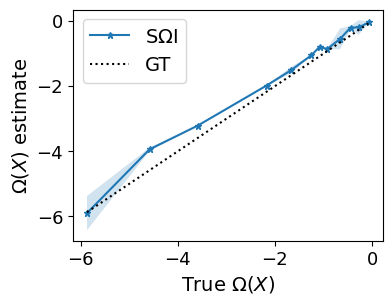

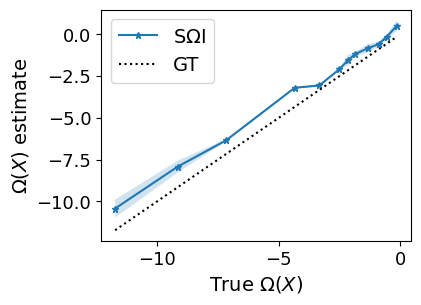

In [8]:
dims=[5,10,15,20]
dims=[10,20]
setting = 0
bench = "syn"
arch = "tx"
seeds =[77 ,55 , 33 ,22, 11]
seeds =[77 ,55 ]
rhos = [ 0.7, 0.65 ,0.6, 0.55, 0.5, 0.475, 0.45 ,0.425 ,0.4, 0.375, 0.35, 0.325 ,0.3, 0.25, 0.2, 0.1 ]
rhos = [0.7, 0.65 , 0.6 , 0.5 , 0.45 , 0.4 ,0.375, 0.35, 0.3, 0.25, 0.2 ,0.1] 
    
path = "plots/"
if not os.path.exists(path):
    os.makedirs(path)

path_soi = "/home/bounoua/work/soi_clean/soi/results/soi/{}/{}/seed_{}/setting_{}/dim_{}/rho{}.json"
path_b = "../../results/baseline/{}/{}/seed_{}/setting_{}/dim_{}/rho{}.json"


for dim in dims: 
    baselines = ["MINE","InfoNCE","NWJ","CLUB"]
    baselines=[]
    filename="plots/plot_{}_{}_set_{}_dim_{}.jpg".format(arch,bench,setting,dim)

    
    results = {}
    
    results ["SOI"] = gen_plots(path_soi,
                           seeds= seeds,
                           rhos=rhos,bench=bench,arch=arch,setting=setting,dim=dim)
   
    seed = 42
    for base in baselines:
        results[base] = gen_plots_base(path_b,bench=bench,rhos=rhos,base=base,seeds=[77],setting=setting,dim=dim)

    
    plot( results=results,filename=filename,plot_std=True)
